<a href="https://colab.research.google.com/github/pach28/Estimation-of-Probability-of-Defaults-PD-for-Low-Default-Portfolios-An-Actuarial-Approach/blob/main/Estimation_of_Probability_of_Defaults_cpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necesary libraries

In [65]:
import pandas as pd
from scipy.special import comb
import numpy as np
from scipy.stats import binom, poisson

upload original portafolio data

In [66]:

data = {
    'Grade': ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C'],
    'No. of Customers': [34, 56, 119, 257, 191, 102, 50, 34, 12],
    'No. of Defaults': [1, 1, 3, 2, 2, 6, 3, 1, 2]
}

df = pd.DataFrame(data)


add column of bayesian estimate n_i/N

n = defaults in a grade i
N = total defaults

In [67]:
total_defaults = df['No. of Defaults'].sum()

df['Bayesian Estimates'] = df['No. of Defaults'] / total_defaults

print(df)

  Grade  No. of Customers  No. of Defaults  Bayesian Estimates
0   AAA                34                1            0.047619
1    AA                56                1            0.047619
2     A               119                3            0.142857
3   BBB               257                2            0.095238
4    BB               191                2            0.095238
5     B               102                6            0.285714
6   CCC                50                3            0.142857
7    CC                34                1            0.047619
8     C                12                2            0.095238


modified portafolio with 1 client per grade (probability or ratio of defaults per grade)

In [68]:
df_copy = df.copy()
#dividimos cada no.of customers sobre si mismos y No. of defaults sobre no.costumers
df_copy['No. of Defaults'] = df_copy['No. of Defaults'] / df_copy['No. of Customers']
df_copy['No. of Customers'] = df_copy['No. of Customers'] / df_copy['No. of Customers']
df_copy['Bayesian Estimates'] = df_copy['No. of Defaults'] / df_copy['No. of Defaults'].sum()
print(df_copy)

  Grade  No. of Customers  No. of Defaults  Bayesian Estimates
0   AAA               1.0         0.029412            0.072508
1    AA               1.0         0.017857            0.044023
2     A               1.0         0.025210            0.062150
3   BBB               1.0         0.007782            0.019185
4    BB               1.0         0.010471            0.025814
5     B               1.0         0.058824            0.145016
6   CCC               1.0         0.060000            0.147917
7    CC               1.0         0.029412            0.072508
8     C               1.0         0.166667            0.410879


Binomial Probabilities with bayesian estimate under n = 21 defaults and k deafaults

In [69]:
all_probabilities =list()
n=21
for grade_index in range(len(df)):
    p = df['Bayesian Estimates'][grade_index]  # Probabilidad para el grado actual
    probabilities =[]
    for k in range(n + 1):
        prob = comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
        probabilities.append(prob)
    all_probabilities.append(np.round(probabilities,6))

# Crear un DataFrame para las probabilidades (transpuesto)
df_prob = pd.DataFrame(all_probabilities, index=df['Grade']).T
df_prob.index.name = 'k'
df_prob.columns.name = 'Grade'
print("Probabilidades Binomiales:")
df_prob

Probabilidades Binomiales:


Grade,AAA,AA,A,BBB,BB,B,CCC,CC,C
k,,,,,,,,,
0,0.358942,0.358942,0.039275,0.122242,0.122242,0.000854,0.039275,0.358942,0.122242
1,0.376889,0.376889,0.137463,0.270219,0.270219,0.007171,0.137463,0.376889,0.270219
2,0.188445,0.188445,0.229105,0.284441,0.284441,0.028685,0.229105,0.188445,0.284441
3,0.059674,0.059674,0.241833,0.189627,0.189627,0.072668,0.241833,0.059674,0.189627
4,0.013427,0.013427,0.181375,0.089824,0.089824,0.130802,0.181375,0.013427,0.089824
5,0.002283,0.002283,0.102779,0.032147,0.032147,0.177891,0.102779,0.002283,0.032147
6,0.000304,0.000304,0.045680,0.009024,0.009024,0.189751,0.045680,0.000304,0.009024
7,0.000033,0.000033,0.016314,0.002035,0.002035,0.162643,0.016314,0.000033,0.002035
8,0.000003,0.000003,0.004758,0.000375,0.000375,0.113850,0.004758,0.000003,0.000375


Add column for Lambda of the portafolio n_i/n_c_i

n_i = number of defaults in a grade i

n_c_i = number of customers in a grade i

In [70]:
#Calculamos lambda dividiendo el numero de defaults entre el numero total de clientes en cada grado
df['Lambda'] = df['No. of Defaults'] / df['No. of Customers']
print(df)

  Grade  No. of Customers  No. of Defaults  Bayesian Estimates    Lambda
0   AAA                34                1            0.047619  0.029412
1    AA                56                1            0.047619  0.017857
2     A               119                3            0.142857  0.025210
3   BBB               257                2            0.095238  0.007782
4    BB               191                2            0.095238  0.010471
5     B               102                6            0.285714  0.058824
6   CCC                50                3            0.142857  0.060000
7    CC                34                1            0.047619  0.029412
8     C                12                2            0.095238  0.166667


Poisson Probabilities with Lambda parameter, with n number of defaults

In [71]:
poisson_probabilities =list()


for n in range(21):
    probs_for_n =[]
    for grade_lambda in df['Lambda']:
        prob = poisson.pmf(n, grade_lambda)
        probs_for_n.append(prob)
    poisson_probabilities.append(np.round(probs_for_n,5))

# Crear un DataFrame para las probabilidades de Poisson
df_prob_poisson = pd.DataFrame(poisson_probabilities, columns=df['Grade'])
df_prob_poisson.insert(0, 'n', range(21))

# Mostrar el DataFrame de probabilidades de Poisson (primeras 5 filas)
print("\nProbabilidades de Poisson:")
df_prob_poisson


Probabilidades de Poisson:


Grade,n,AAA,AA,A,BBB,BB,B,CCC,CC,C
0,0,0.97102,0.98230,0.97511,0.99225,0.98958,0.94287,0.94176,0.97102,0.84648
1,1,0.02856,0.01754,0.02458,0.00772,0.01036,0.05546,0.05651,0.02856,0.14108
2,2,0.00042,0.00016,0.00031,0.00003,0.00005,0.00163,0.00170,0.00042,0.01176
3,3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00003,0.00003,0.00000,0.00065
4,4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00003
5,5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,6,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,7,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8,8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


create another scenario with growing bayesian estimates

In [72]:
df_1 = pd.DataFrame({
    "Grade": ["AAA", "AA", "A", "BBB", "BB", "B", "CCC", "CC", "C"],
    "No. of Customers": [34, 56, 119, 514, 382, 102, 100, 272, 48],
    "No. of Defaults": [1, 1, 3, 4, 4, 6, 6, 8, 8]
})


total_defaults_1 = df_1["No. of Defaults"].sum()
df_1["Bayesian Estimates"] = df_1["No. of Defaults"] / total_defaults_1
df_1["Lambda"] = df_1["No. of Defaults"] / df_1["No. of Customers"]

save the parameters of the portafolio

In [73]:
grade_params = {
    row["Grade"]: {
        "p": row["Bayesian Estimates"],
        "lambda": row["Lambda"]
    } for _, row in df_1.iterrows()
}


print(grade_params)

{'AAA': {'p': 0.024390243902439025, 'lambda': 0.029411764705882353}, 'AA': {'p': 0.024390243902439025, 'lambda': 0.017857142857142856}, 'A': {'p': 0.07317073170731707, 'lambda': 0.025210084033613446}, 'BBB': {'p': 0.0975609756097561, 'lambda': 0.007782101167315175}, 'BB': {'p': 0.0975609756097561, 'lambda': 0.010471204188481676}, 'B': {'p': 0.14634146341463414, 'lambda': 0.058823529411764705}, 'CCC': {'p': 0.14634146341463414, 'lambda': 0.06}, 'CC': {'p': 0.1951219512195122, 'lambda': 0.029411764705882353}, 'C': {'p': 0.1951219512195122, 'lambda': 0.16666666666666666}}


add column lambda for the 1 client per grade portafolio

In [74]:
df_copy['Lambda'] = df_1['Lambda']
df_copy

,Grade,No. of Customers,No. of Defaults,Bayesian Estimates,Lambda
0,AAA,1.0,0.029412,0.072508,0.029412
1,AA,1.0,0.017857,0.044023,0.017857
2,A,1.0,0.025210,0.062150,0.025210
3,BBB,1.0,0.007782,0.019185,0.007782
4,BB,1.0,0.010471,0.025814,0.010471
5,B,1.0,0.058824,0.145016,0.058824
6,CCC,1.0,0.060000,0.147917,0.060000
7,CC,1.0,0.029412,0.072508,0.029412
8,C,1.0,0.166667,0.410879,0.166667


In [75]:
df_copy_normal = df_copy.copy()

estimate general probability of default on a different way

In [76]:
p_b = df_copy_normal['No. of Defaults'].sum()/df_copy_normal['No. of Customers'].sum()

In [77]:
p_b

np.float64(0.045070473081861025)

for convolution interest on obtain new PDs we scale data of defaults

In [78]:
#para estimar por teorema de bayes probabilidades de default, normalizamos los datos para que la suma de defaults sea 1
suma_def_1 = df['No. of Defaults'].sum()

In [79]:
#dividimos customers y defaults sobre suma_def_1
df_copy['No. of Defaults'] = df['No. of Defaults'] / suma_def_1
df_copy['No. of Customers'] = df['No. of Customers'] / suma_def_1
df_copy

,Grade,No. of Customers,No. of Defaults,Bayesian Estimates,Lambda
0,AAA,1.619048,0.047619,0.072508,0.029412
1,AA,2.666667,0.047619,0.044023,0.017857
2,A,5.666667,0.142857,0.062150,0.025210
3,BBB,12.238095,0.095238,0.019185,0.007782
4,BB,9.095238,0.095238,0.025814,0.010471
5,B,4.857143,0.285714,0.145016,0.058824
6,CCC,2.380952,0.142857,0.147917,0.060000
7,CC,1.619048,0.047619,0.072508,0.029412
8,C,0.571429,0.095238,0.410879,0.166667


convolution between Binomial and Poisson with the objetive to reach a distribution of defaults, beginning with 1 total defaults, the probabilities of every grade own that default

In [80]:
df_1 = df_copy.copy()

grade_params = {
    row["Grade"]: {
        "p": row["No. of Defaults"],
        "lambda": row["Lambda"]
    } for _, row in df_1.iterrows()
}


print(grade_params)

# Parámetros para la convolución
n = round(df_1["No. of Defaults"].sum())
x_values = np.arange(0, n+1)
num_convoluciones = 4  # Número de iteraciones de convolución

def convolucion_binomial_poisson(grade):
    """
    Calcula la convolución de la distribución Binomial y Poisson iterativamente.
    """
    p = grade_params[grade]["p"]
    lambda_ = grade_params[grade]["lambda"]

    # Primera distribución: Binomial * Poisson
    binomial = binom.pmf(x_values, n, p)
    poisson_ = poisson.pmf(x_values, lambda_)# * n)
    f_values = np.convolve(binomial,  poisson_, mode='full')[:len(x_values)]

    # Crear DataFrame para almacenar resultados
    df_convolucion = pd.DataFrame({
        "x": x_values,
        "f1(x)": f_values
    })

    # Iterar convolución con Poisson hasta f elegir(x)
    for i in range(2, num_convoluciones + 1):
        f_values = np.convolve(f_values, poisson_, mode='full')[:len(x_values)]
        df_convolucion[f"f{i}(x)"] = f_values

    return df_convolucion

# Generar DataFrames para cada grado automáticamente
dataframes = {grado: convolucion_binomial_poisson(grado) for grado in grade_params}


for grado, df in dataframes.items():
    print(f"--- Tabla para {grado} ---")
    display(df)



{'AAA': {'p': 0.047619047619047616, 'lambda': 0.029411764705882353}, 'AA': {'p': 0.047619047619047616, 'lambda': 0.017857142857142856}, 'A': {'p': 0.14285714285714285, 'lambda': 0.025210084033613446}, 'BBB': {'p': 0.09523809523809523, 'lambda': 0.007782101167315175}, 'BB': {'p': 0.09523809523809523, 'lambda': 0.010471204188481676}, 'B': {'p': 0.2857142857142857, 'lambda': 0.058823529411764705}, 'CCC': {'p': 0.14285714285714285, 'lambda': 0.06}, 'CC': {'p': 0.047619047619047616, 'lambda': 0.029411764705882353}, 'C': {'p': 0.09523809523809523, 'lambda': 0.16666666666666666}}
--- Tabla para AAA ---


,x,f1(x),f2(x),f3(x),f4(x)
0,0,0.924778,0.897974,0.871948,0.846676
1,1,0.073438,0.097721,0.120534,0.141943


--- Tabla para AA ---


,x,f1(x),f2(x),f3(x),f4(x)
0,0,0.935525,0.918968,0.902703,0.886726
1,1,0.063482,0.078769,0.093494,0.107674


--- Tabla para A ---


,x,f1(x),f2(x),f3(x),f4(x)
0,0,0.835804,0.814997,0.794708,0.774923
1,1,0.160371,0.176925,0.192555,0.207297


--- Tabla para BBB ---


,x,f1(x),f2(x),f3(x),f4(x)
0,0,0.897748,0.890789,0.883884,0.877032
1,1,0.101486,0.107632,0.113676,0.119620


--- Tabla para BB ---


,x,f1(x),f2(x),f3(x),f4(x)
0,0,0.895337,0.886011,0.876782,0.867649
1,1,0.103621,0.111820,0.119836,0.127673


--- Tabla para B ---


,x,f1(x),f2(x),f3(x),f4(x)
0,0,0.673481,0.635007,0.598731,0.564527
1,1,0.309009,0.328709,0.345151,0.358641


--- Tabla para CCC ---


,x,f1(x),f2(x),f3(x),f4(x)
0,0,0.807227,0.760218,0.715946,0.674252
1,1,0.182971,0.217929,0.248195,0.274196


--- Tabla para CC ---


,x,f1(x),f2(x),f3(x),f4(x)
0,0,0.924778,0.897974,0.871948,0.846676
1,1,0.073438,0.097721,0.120534,0.141943


--- Tabla para C ---


,x,f1(x),f2(x),f3(x),f4(x)
0,0,0.765864,0.648290,0.548766,0.464520
1,1,0.208261,0.284338,0.332148,0.358577


extract the distribution of the default after 4 convolutions, first poisson-binomial, then the result-poisson successively

In [81]:
def mostrar_y_extraer_fila(fila):

    valores_extraidos = {}

    for grado, df in dataframes.items():

        # Extraer el valor de la última columna en la fila dada
        ultima_columna = df.columns[-1]
        if fila in df.index:
            valores_extraidos[grado] = df.loc[fila, ultima_columna]
        else:
            valores_extraidos[grado] = None

    print("\n--- Valores extraídos de la última columna ---")
    for grado, valor in valores_extraidos.items():
        print(f"{grado}: {valor}")

    return valores_extraidos

a = mostrar_y_extraer_fila(0)
b = mostrar_y_extraer_fila(1)


--- Valores extraídos de la última columna ---
AAA: 0.8466759670502629
AA: 0.8867264568609748
A: 0.7749234598718415
BBB: 0.8770319438892632
BB: 0.8676487819371403
B: 0.5645274021296416
CCC: 0.6742524523427601
CC: 0.8466759670502629
C: 0.4645202505532977

--- Valores extraídos de la última columna ---
AAA: 0.14194273565254403
AA: 0.10767392690454687
A: 0.20729745215059067
BBB: 0.1196197572455968
BB: 0.1276727609684301
B: 0.35864093782353706
CCC: 0.2741959972860557
CC: 0.14194273565254403
C: 0.3585770355148263


with the lambda of poisson distribution taking the info of the weight of each grade, the probability of being of every grade P(A): we are taking of the modified portafolio of 1 customer per grade

In [82]:
#percentage every calif
p_a = df_copy_normal['No. of Customers']/df_copy_normal['No. of Customers'].sum()
b_values = list(b.values())

2 options, the difference is on P(B)

where on new_pds are the mean of lambdas (equal in every portafolio modified or not)

and on new_pds_2 are the same ratio between total costumers and defaults

In [83]:
new_pds = []
for i in range(len(b_values)):
  new = (b_values[i]*p_b)/p_a[i]
  new_pds.append(new)

In [84]:
p_b_2 = 21/855
new_pds_2 = []
for i in range(len(b_values)):
  new = (b_values[i]*p_b_2)/p_a[i]
  new_pds_2.append(new)
new_pds_2

[np.float64(0.031376815249509735),
 np.float64(0.02380160489468931),
 np.float64(0.045823647317498994),
 np.float64(0.026442262127974032),
 np.float64(0.028222399793021397),
 np.float64(0.07927852309783452),
 np.float64(0.060611746768496524),
 np.float64(0.031376815249509735),
 np.float64(0.07926439732433002)]

In [85]:
new_pds

[np.float64(0.05757683621754331),
 np.float64(0.04367623341752687),
 np.float64(0.08408694813382414),
 np.float64(0.04852187144096779),
 np.float64(0.05178844562863056),
 np.float64(0.1454770506080621),
 np.float64(0.11122328983351691),
 np.float64(0.05757683621754331),
 np.float64(0.14545112964250054)]

plot the probability of have a default in each grade, info from the convolutions

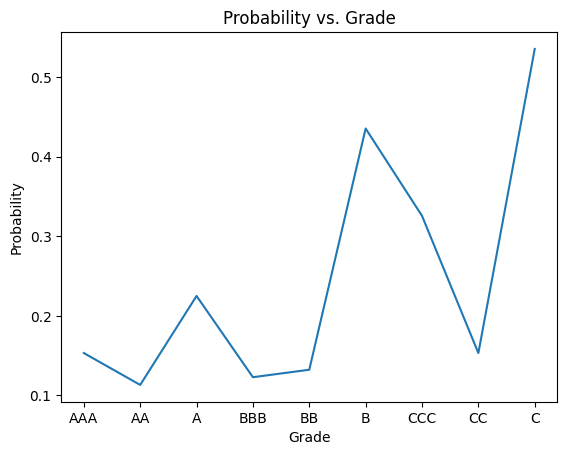

In [86]:
import matplotlib.pyplot as plt

# Extract keys (x-axis) and values (y-axis) from the dictionary
x_values_0 = list(a.keys())
y_values_0 = [1-val for val in list(a.values())]

# Create the plot
plt.plot(x_values_0, y_values_0)

# Customize the plot (optional)
plt.xlabel("Grade")
plt.ylabel("Probability")
plt.title("Probability vs. Grade")

# Display the plot
plt.show()

plot the distribution of 1 default on the portafolio

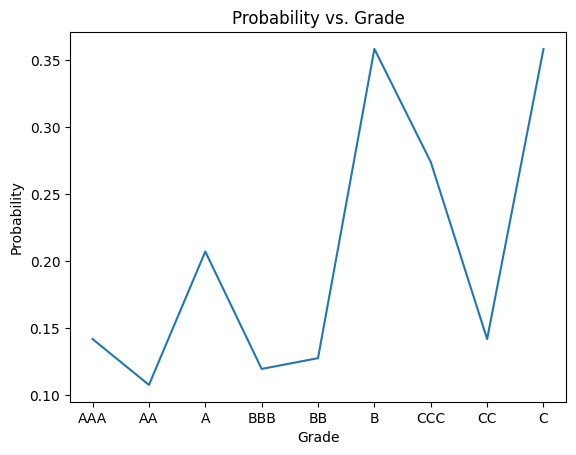

In [87]:
# Extract keys (x-axis) and values (y-axis) from the dictionary
x_values = list(b.keys())
y_values = list(b.values())

# Create the plot
plt.plot(x_values, y_values)

# Customize the plot (optional)
plt.xlabel("Grade")
plt.ylabel("Probability")
plt.title("Probability vs. Grade")

# Display the plot
plt.show()

smooth/soft probabilities with exponential regression, both new pds

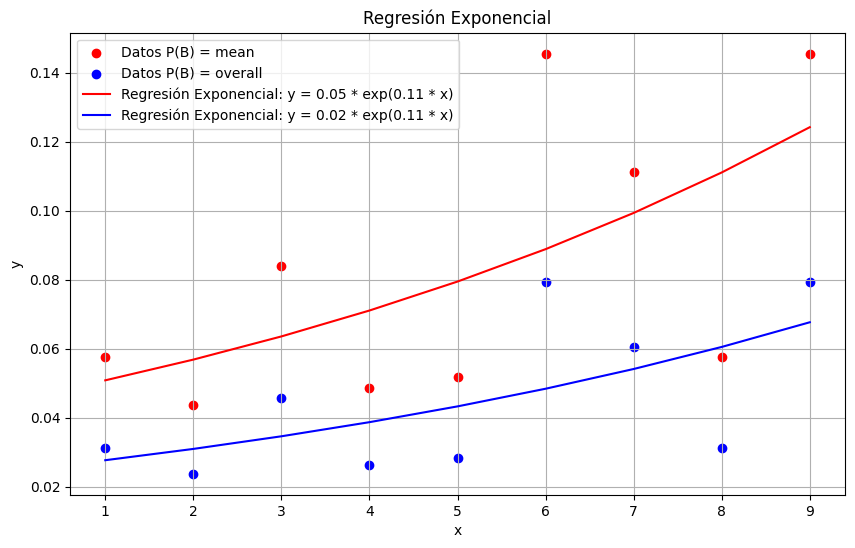

Parámetro a óptimo: 0.05
Parámetro b óptimo: 0.11


In [88]:
#como se veria una grafica de regresion exp con los valores de x_values y y_values
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Supongamos que tienes tus datos x e y en listas o arrays de NumPy
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
#aqui hay dos formas

y_data_2 = new_pds_2 #P(B) general
y_data = new_pds #P(B) promedio

# 1. Definir la función exponencial que queremos ajustar
def exponential_function(x, a, b):
    return a * np.exp(b * x)

# 2. Ajustar la curva exponencial a los datos
popt, pcov = curve_fit(exponential_function, x_data, y_data, p0=[1, 1]) # p0 es una estimación inicial de los parámetros
popt_2, pcov_2 = curve_fit(exponential_function, x_data, y_data_2, p0=[1, 1]) # p0 es una estimación inicial de los parámetros
# 3. Obtener los parámetros ajustados
a_optimo, b_optimo = popt
a_optimo_2, b_optimo_2 = popt_2
# 4. Generar la curva de regresión exponencial utilizando los parámetros óptimos
y_fit = exponential_function(x_data, a_optimo, b_optimo)
y_fit_2 = exponential_function(x_data, a_optimo_2, b_optimo_2)
# 5. Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data,color='red', label='Datos P(B) = mean')
plt.scatter(x_data, y_data_2,color= 'blue', label='Datos P(B) = overall')
plt.plot(x_data, y_fit, color='red', label=f'Regresión Exponencial: y = {a_optimo:.2f} * exp({b_optimo:.2f} * x)')
plt.plot(x_data, y_fit_2, color='blue', label=f'Regresión Exponencial: y = {a_optimo_2:.2f} * exp({b_optimo_2:.2f} * x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Exponencial')
plt.legend()
plt.grid(True)
plt.show()

# (Opcional) Imprimir los parámetros ajustados
print(f"Parámetro a óptimo: {a_optimo:.2f}")
print(f"Parámetro b óptimo: {b_optimo:.2f}")

In [89]:
#el ajuste exponencial despues de aplicar teorema de bayes para obtener las probabilidades de default por cada calificacion arroja algo con lo que podemos trabajar y refinar
y_fit

array([0.05085746, 0.05686207, 0.06357563, 0.07108184, 0.07947429,
       0.08885761, 0.0993488 , 0.11107866, 0.12419343])

In [90]:
y_fit_2

array([0.02771505, 0.0309873 , 0.03464589, 0.03873644, 0.04330995,
       0.04842345, 0.05414068, 0.06053293, 0.0676799 ])

recall the original data

In [91]:
df_original = pd.DataFrame(data)
df_original

,Grade,No. of Customers,No. of Defaults
0,AAA,34,1
1,AA,56,1
2,A,119,3
3,BBB,257,2
4,BB,191,2
5,B,102,6
6,CCC,50,3
7,CC,34,1
8,C,12,2


In [92]:
total_defaults = df_original['No. of Defaults'].sum()

df_original['Bayesian Estimates'] = df_original['No. of Defaults'] / total_defaults

In [93]:
df_original['Lambda'] = df_original['No. of Defaults'] / df_original['No. of Customers']

add both new exponential PDs

In [94]:
df_original['Implied PD 1'] = y_fit
df_original['Implied PD 2'] = y_fit_2

In [95]:
#haremos lo mismo de las convoluciones pero ahora con el implied pd
df_original

,Grade,No. of Customers,No. of Defaults,Bayesian Estimates,Lambda,Implied PD 1,Implied PD 2
0,AAA,34,1,0.047619,0.029412,0.050857,0.027715
1,AA,56,1,0.047619,0.017857,0.056862,0.030987
2,A,119,3,0.142857,0.025210,0.063576,0.034646
3,BBB,257,2,0.095238,0.007782,0.071082,0.038736
4,BB,191,2,0.095238,0.010471,0.079474,0.043310
5,B,102,6,0.285714,0.058824,0.088858,0.048423
6,CCC,50,3,0.142857,0.060000,0.099349,0.054141
7,CC,34,1,0.047619,0.029412,0.111079,0.060533
8,C,12,2,0.095238,0.166667,0.124193,0.067680


now, we convoluted again to obtain the real weight aplied on the real portafolio, searching the real deafaults and capture the probability

In [96]:
df_1 = df_original.copy()

grade_params = {
    row["Grade"]: {
        "p": row["Bayesian Estimates"],
        "lambda": row["Implied PD 1"]
    } for _, row in df_1.iterrows()
}


print(grade_params)

# Parámetros para la convolución
n = df_1["No. of Defaults"].sum()
x_values = np.arange(0, n+1)
num_convoluciones = 3  # Número de iteraciones de convolución

# Generar DataFrames para cada grado automáticamente
dataframes = {grado: convolucion_binomial_poisson(grado) for grado in grade_params}


for grado, df in dataframes.items():
    print(f"--- Tabla para {grado} ---")
    display(df)


{'AAA': {'p': 0.047619047619047616, 'lambda': 0.05085746114329775}, 'AA': {'p': 0.047619047619047616, 'lambda': 0.0568620704325109}, 'A': {'p': 0.14285714285714285, 'lambda': 0.06357562845619812}, 'BBB': {'p': 0.09523809523809523, 'lambda': 0.07108183896324698}, 'BB': {'p': 0.09523809523809523, 'lambda': 0.07947428838832635}, 'B': {'p': 0.2857142857142857, 'lambda': 0.08885761267511172}, 'CCC': {'p': 0.14285714285714285, 'lambda': 0.09934880186331982}, 'CC': {'p': 0.047619047619047616, 'lambda': 0.11107865870497034}, 'C': {'p': 0.09523809523809523, 'lambda': 0.1241934294957081}}
--- Tabla para AAA ---


,x,f1(x),f2(x),f3(x)
0,0,3.411439e-01,3.242280e-01,3.081509e-01
1,1,3.755508e-01,3.734182e-01,3.705737e-01
2,2,1.977589e-01,2.065247e-01,2.147319e-01
3,3,6.629449e-02,7.303473e-02,7.986147e-02
4,4,1.588487e-02,1.855258e-02,2.142452e-02
5,5,2.895717e-03,3.605640e-03,4.417773e-03
6,6,4.173726e-04,5.576022e-04,7.286147e-04
7,7,4.880277e-05,7.046507e-05,9.876129e-05
8,8,4.713156e-06,7.416090e-06,1.121993e-05
9,9,3.808166e-07,6.592393e-07,1.084247e-06


--- Tabla para AA ---


,x,f1(x),f2(x),f3(x)
0,0,3.391016e-01,3.203575e-01,3.026496e-01
1,1,3.753387e-01,3.728078e-01,3.694099e-01
2,2,1.988227e-01,2.085133e-01,2.175038e-01
3,3,6.708471e-02,7.464018e-02,8.229418e-02
4,4,1.618902e-02,1.921255e-02,2.248954e-02
5,5,2.974388e-03,3.788004e-03,4.730886e-03
6,6,4.324445e-04,5.950728e-04,7.972588e-04
7,7,5.105422e-05,7.650259e-05,1.106138e-04
8,8,4.983811e-06,8.204464e-06,1.288737e-05
9,9,4.075577e-07,7.445507e-07,1.279850e-06


--- Tabla para A ---


,x,f1(x),f2(x),f3(x)
0,0,3.685589e-02,3.458568e-02,3.245531e-02
1,1,1.313387e-01,1.254475e-01,1.197837e-01
2,2,2.232681e-01,2.174210e-01,2.115783e-01
3,3,2.408673e-01,2.396013e-01,2.380531e-01
4,4,1.850702e-01,1.884692e-01,1.915720e-01
5,5,1.077368e-01,1.126076e-01,1.173785e-01
6,6,4.935141e-02,5.309984e-02,5.691437e-02
7,7,1.823681e-02,2.026967e-02,2.241032e-02
8,8,5.529361e-03,6.374812e-03,7.296772e-03
9,9,1.391672e-03,1.672468e-03,1.990415e-03


--- Tabla para BBB ---


,x,f1(x),f2(x),f3(x)
0,0,1.138544e-01,1.060424e-01,9.876637e-02
1,1,2.597712e-01,2.494849e-01,2.393871e-01
2,2,2.831018e-01,2.811430e-01,2.786191e-01
3,3,1.960903e-01,2.019959e-01,2.073420e-01
4,4,9.689904e-02,1.039132e-01,1.108318e-01
5,5,3.635065e-02,4.074907e-02,4.532385e-02
6,6,1.075517e-02,1.266301e-02,1.474797e-02
7,7,2.574048e-03,3.200606e-03,3.921227e-03
8,8,5.070970e-04,6.701487e-04,8.682352e-04
9,9,8.324748e-05,1.178014e-04,1.623642e-04


--- Tabla para BB ---


,x,f1(x),f2(x),f3(x)
0,0,1.129029e-01,1.042773e-01,9.631073e-02
1,1,2.585478e-01,2.470825e-01,2.358601e-01
2,2,2.829017e-01,2.805959e-01,2.775996e-01
3,3,1.968166e-01,2.033088e-01,2.091015e-01
4,4,9.773106e-02,1.055567e-01,1.132535e-01
5,5,3.686015e-02,4.181415e-02,4.698284e-02
6,6,1.097121e-02,1.313938e-02,1.552885e-02
7,7,2.643323e-03,3.362068e-03,4.200116e-03
8,8,5.246602e-04,7.136079e-04,9.475972e-04
9,9,8.686293e-05,1.273550e-04,1.808946e-04


--- Tabla para B ---


,x,f1(x),f2(x),f3(x)
0,0,7.811256e-04,7.147111e-04,6.539434e-04
1,1,6.630864e-03,6.130588e-03,5.667448e-03
2,2,2.683194e-02,2.509250e-02,2.346005e-02
3,3,6.884755e-02,6.519938e-02,6.171817e-02
4,4,1.256934e-01,1.207016e-01,1.158312e-01
5,5,1.736662e-01,1.693712e-01,1.650221e-01
6,6,1.885605e-01,1.871093e-01,1.854138e-01
7,7,1.648987e-01,1.668497e-01,1.685007e-01
8,8,1.180984e-01,1.221638e-01,1.260365e-01
9,9,7.005183e-02,7.431367e-02,7.855056e-02


--- Tabla para CCC ---


,x,f1(x),f2(x),f3(x)
0,0,3.556074e-02,3.219765e-02,2.915261e-02
1,1,1.279955e-01,1.190894e-01,1.107230e-01
2,2,2.199784e-01,2.108468e-01,2.017627e-01
3,3,2.401907e-01,2.378400e-01,2.348499e-01
4,4,1.870193e-01,1.919402e-01,1.961421e-01
5,5,1.104890e-01,1.179690e-01,1.251723e-01
6,6,5.145185e-02,5.739675e-02,6.347386e-02
7,7,1.936726e-02,2.268616e-02,2.626010e-02
8,8,5.995791e-03,7.417855e-03,9.031664e-03
9,9,1.545249e-03,2.033023e-03,2.618324e-03


--- Tabla para CC ---


,x,f1(x),f2(x),f3(x)
0,0,3.212062e-01,2.874372e-01,2.572185e-01
1,1,3.729456e-01,3.656654e-01,3.557939e-01
2,2,2.080779e-01,2.250467e-01,2.393214e-01
3,3,7.428613e-02,8.928397e-02,1.043447e-01
4,4,1.906619e-02,2.567261e-02,3.316729e-02
5,5,3.747338e-03,5.703367e-03,8.196659e-03
6,6,5.866687e-04,1.019151e-03,1.640229e-03
7,7,7.514005e-05,1.505896e-04,2.733324e-04
8,8,8.025351e-06,1.877349e-05,3.871825e-05
9,9,7.250274e-07,2.005129e-06,4.735932e-06


--- Tabla para C ---


,x,f1(x),f2(x),f3(x)
0,0,1.079652e-01,9.535586e-02,8.421915e-02
1,1,2.520686e-01,2.344718e-01,2.175470e-01
2,2,2.816937e-01,2.771788e-01,2.711753e-01
3,3,2.005557e-01,2.097786e-01,2.173057e-01
4,4,1.021476e-01,1.142071e-01,1.258340e-01
5,5,3.961969e-02,4.764462e-02,5.611649e-02
6,6,1.216396e-02,1.584399e-02,2.005916e-02
7,7,3.033556e-03,4.313997e-03,5.906691e-03
8,8,6.257838e-04,9.804082e-04,1.461502e-03
9,9,1.081902e-04,1.886584e-04,3.084590e-04


In [97]:
aaa_conv = dataframes['AAA'].iloc[1, 1]
aa_conv = dataframes['AA'].iloc[1, 1]
a_conv = dataframes['A'].iloc[3, 1]
bbb_conv = dataframes['BBB'].iloc[2, 1]
bb_conv = dataframes['BB'].iloc[2, 1]
b_conv = dataframes['B'].iloc[6, 1]
ccc_conv = dataframes['CCC'].iloc[3, 1]
cc_conv = dataframes['CC'].iloc[1, 1]
c_conv = dataframes['C'].iloc[2, 1]
#hacer un df de todas
weigth_conv_1 = [aaa_conv, aa_conv, a_conv, bbb_conv, bb_conv, b_conv, ccc_conv, cc_conv, c_conv]
weigth_conv_1

[np.float64(0.37555080308565914),
 np.float64(0.3753386966228743),
 np.float64(0.24086727856721168),
 np.float64(0.2831018482398084),
 np.float64(0.2829017453076141),
 np.float64(0.18856048320929247),
 np.float64(0.2401906872904154),
 np.float64(0.37294562217495686),
 np.float64(0.2816936606238373)]

In [98]:
#ahora si podemos hacer una mezcla por pesos de las probabilidad
# weigth_pds = df_original['Imputed PD']*weigth_conv + df_original['Lambda']*(1-weigth_conv)
weigth_pds_1 = df_original['Implied PD 1']*np.array(weigth_conv_1) + df_original['Lambda']*(1-np.array(weigth_conv_1))
weigth_pds_1

,0
0,0.037466
1,0.032497
2,0.034451
3,0.025702
4,0.029992
5,0.064487
6,0.069451
7,0.059869
8,0.154702


In [99]:
df_1 = df_original.copy()

grade_params = {
    row["Grade"]: {
        "p": row["Bayesian Estimates"],
        "lambda": row["Implied PD 2"]
    } for _, row in df_1.iterrows()
}


print(grade_params)

# Parámetros para la convolución
n = df_1["No. of Defaults"].sum()
x_values = np.arange(0, n+1)
num_convoluciones = 3  # Número de iteraciones de convolución

# Generar DataFrames para cada grado automáticamente
dataframes = {grado: convolucion_binomial_poisson(grado) for grado in grade_params}


for grado, df in dataframes.items():
    print(f"--- Tabla para {grado} ---")
    display(df)

{'AAA': {'p': 0.047619047619047616, 'lambda': 0.027715054712021757}, 'AA': {'p': 0.047619047619047616, 'lambda': 0.0309872997404158}, 'A': {'p': 0.14285714285714285, 'lambda': 0.034645890299681376}, 'BBB': {'p': 0.09523809523809523, 'lambda': 0.03873644121020301}, 'BB': {'p': 0.09523809523809523, 'lambda': 0.043309952916560326}, 'B': {'p': 0.2857142857142857, 'lambda': 0.04842344735428631}, 'CCC': {'p': 0.14285714285714285, 'lambda': 0.05414067889177387}, 'CC': {'p': 0.047619047619047616, 'lambda': 0.060532929211259585}, 'C': {'p': 0.09523809523809523, 'lambda': 0.06767989603935513}}
--- Tabla para AAA ---


,x,f1(x),f2(x),f3(x)
0,0,3.491308e-01,3.395875e-01,3.303051e-01
1,1,3.762636e-01,3.753903e-01,3.742836e-01
2,2,1.935878e-01,1.985697e-01,2.033883e-01
3,3,6.326503e-02,6.689611e-02,7.056188e-02
4,4,1.474005e-02,1.611622e-02,1.755453e-02
5,5,2.605046e-03,2.955504e-03,3.334853e-03
6,6,3.627770e-04,4.288155e-04,5.030230e-04
7,7,4.082101e-05,5.051030e-05,6.185072e-05
8,8,3.776098e-06,4.918183e-06,6.316161e-06
9,9,2.906318e-07,4.010471e-07,5.430881e-07


--- Tabla para AA ---


,x,f1(x),f2(x),f3(x)
0,0,3.479903e-01,3.373724e-01,3.270784e-01
1,1,3.761731e-01,3.751495e-01,3.738382e-01
2,2,1.941844e-01,1.997223e-01,2.050556e-01
3,3,6.369176e-02,6.775880e-02,7.186760e-02
4,4,1.489927e-02,1.645028e-02,1.807873e-02
5,5,2.644950e-03,3.042441e-03,3.476319e-03
6,6,3.701674e-04,4.455804e-04,5.313754e-04
7,7,4.188486e-05,5.303252e-05,6.629821e-05
8,8,3.898853e-06,5.223771e-06,6.880230e-06
9,9,3.022182e-07,4.315028e-07,6.022121e-07


--- Tabla para A ---


,x,f1(x),f2(x),f3(x)
0,0,3.793769e-02,3.664581e-02,3.539793e-02
1,1,1.340963e-01,1.307996e-01,1.275719e-01
2,2,2.259263e-01,2.227426e-01,2.195562e-01
3,3,2.413450e-01,2.407655e-01,2.400972e-01
4,4,1.834253e-01,1.853880e-01,1.872625e-01
5,5,1.054907e-01,1.081785e-01,1.108400e-01
6,6,4.767043e-02,4.968545e-02,5.172295e-02
7,7,1.734811e-02,1.841511e-02,1.951477e-02
8,8,5.169404e-03,5.602299e-03,6.057348e-03
9,9,1.275516e-03,1.415464e-03,1.565766e-03


--- Tabla para BBB ---


,x,f1(x),f2(x),f3(x)
0,0,1.175973e-01,1.131291e-01,1.088307e-01
1,1,2.645073e-01,2.588393e-01,2.532202e-01
2,2,2.837915e-01,2.829502e-01,2.819265e-01
3,3,1.932182e-01,1.966441e-01,1.999044e-01
4,4,9.368484e-02,9.753272e-02,1.013614e-01
5,5,3.441269e-02,3.673840e-02,3.912161e-02
6,6,9.945539e-03,1.091947e-02,1.194587e-02
7,7,2.318437e-03,2.626691e-03,2.961240e-03
8,8,4.433756e-04,5.204323e-04,6.067731e-04
9,9,7.037252e-05,8.599008e-05,1.041175e-04


--- Tabla para BB ---


,x,f1(x),f2(x),f3(x)
0,0,1.170607e-01,1.120990e-01,1.073477e-01
1,1,2.638357e-01,2.575079e-01,2.512425e-01
2,2,2.837020e-01,2.827246e-01,2.815218e-01
3,3,1.936313e-01,1.974289e-01,2.010193e-01
4,4,9.413997e-02,9.843875e-02,1.027119e-01
5,5,3.468419e-02,3.729609e-02,3.997896e-02
6,6,1.005780e-02,1.115710e-02,1.232204e-02
7,7,2.353496e-03,2.703280e-03,3.086234e-03
8,8,4.520115e-04,5.399586e-04,6.397067e-04
9,9,7.209424e-05,9.003445e-05,1.111906e-04


--- Tabla para B ---


,x,f1(x),f2(x),f3(x)
0,0,8.133570e-04,7.749098e-04,7.382801e-04
1,1,6.871584e-03,6.584290e-03,6.308803e-03
2,2,2.766059e-02,2.667100e-02,2.571490e-02
3,3,7.056433e-02,6.851257e-02,6.651182e-02
4,4,1.280040e-01,1.252397e-01,1.225104e-01
5,5,1.755984e-01,1.732827e-01,1.709465e-01
6,6,1.891354e-01,1.884404e-01,1.876683e-01
7,7,1.639103e-01,1.650865e-01,1.661723e-01
8,8,1.161873e-01,1.184715e-01,1.207012e-01
9,9,6.810833e-02,7.043565e-02,7.275963e-02


--- Tabla para CCC ---


,x,f1(x),f2(x),f3(x)
0,0,3.720527e-02,3.524451e-02,3.338708e-02
1,1,1.322328e-01,1.271721e-01,1.222776e-01
2,2,2.241354e-01,2.191567e-01,2.141781e-01
3,3,2.410300e-01,2.400073e-01,2.387760e-01
4,4,1.845405e-01,1.874913e-01,1.902271e-01
5,5,1.070062e-01,1.111717e-01,1.152675e-01
6,6,4.880139e-02,5.197990e-02,5.520860e-02
7,7,1.794446e-02,1.965493e-02,2.144413e-02
8,8,5.410285e-03,6.115980e-03,6.876728e-03
9,9,1.353013e-03,1.585361e-03,1.844112e-03


--- Tabla para CC ---


,x,f1(x),f2(x),f3(x)
0,0,3.378591e-01,3.180142e-01,2.993349e-01
1,1,3.752036e-01,3.724155e-01,3.686605e-01
2,2,1.994692e-01,2.097137e-01,2.191634e-01
3,3,6.756860e-02,7.562384e-02,8.378414e-02
4,4,1.637640e-02,1.962159e-02,2.315270e-02
5,5,3.023151e-03,3.902327e-03,4.929011e-03
6,6,4.418478e-04,6.188459e-04,8.414228e-04
7,7,5.246888e-05,8.038249e-05,1.183748e-04
8,8,5.155204e-06,8.718172e-06,1.399989e-05
9,9,4.246385e-07,8.009848e-07,1.413014e-06


--- Tabla para C ---


,x,f1(x),f2(x),f3(x)
0,0,1.142424e-01,1.067664e-01,9.977952e-02
1,1,2.602678e-01,2.504617e-01,2.408245e-01
2,2,2.831805e-01,2.813558e-01,2.790142e-01
3,3,1.957936e-01,2.014548e-01,2.066088e-01
4,4,9.656152e-02,1.032454e-01,1.098456e-01
5,5,3.614489e-02,4.032012e-02,4.465691e-02
6,6,1.066830e-02,1.247273e-02,1.443774e-02
7,7,2.546317e-03,3.136655e-03,3.811757e-03
8,8,5.001006e-04,6.530916e-04,8.374796e-04
9,9,8.181505e-05,1.140888e-04,1.552815e-04


In [100]:
aaa_conv = dataframes['AAA'].iloc[1, 1]
aa_conv = dataframes['AA'].iloc[1, 1]
a_conv = dataframes['A'].iloc[3, 1]
bbb_conv = dataframes['BBB'].iloc[2, 1]
bb_conv = dataframes['BB'].iloc[2, 1]
b_conv = dataframes['B'].iloc[6, 1]
ccc_conv = dataframes['CCC'].iloc[3, 1]
cc_conv = dataframes['CC'].iloc[1, 1]
c_conv = dataframes['C'].iloc[2, 1]
#hacer un df de todas
weigth_conv_2 = [aaa_conv, aa_conv, a_conv, bbb_conv, bb_conv, b_conv, ccc_conv, cc_conv, c_conv]
weigth_conv_2

[np.float64(0.3762635717589686),
 np.float64(0.3761730668437115),
 np.float64(0.24134502255975102),
 np.float64(0.28379148470906107),
 np.float64(0.2837019558181578),
 np.float64(0.18913541317396732),
 np.float64(0.2410300071560166),
 np.float64(0.3752036400551684),
 np.float64(0.2831805073188911)]

In [101]:
#ahora si podemos hacer una mezcla por pesos de las probabilidad
# weigth_pds = df_original['Imputed PD']*weigth_conv + df_original['Lambda']*(1-weigth_conv)
weigth_pds_2 = df_original['Implied PD 2']*np.array(weigth_conv_2) + df_original['Lambda']*(1-np.array(weigth_conv_2))
weigth_pds_2

,0
0,0.028773
1,0.022796
2,0.027487
3,0.016567
4,0.019788
5,0.056857
6,0.058588
7,0.041089
8,0.138636


In [125]:
#df weigth_pds_1 y weigth_pds_2
print(pd.concat([weigth_pds_1, weigth_pds_2], axis=1))

          0         1
0  0.037466  0.028773
1  0.032497  0.022796
2  0.034451  0.027487
3  0.025702  0.016567
4  0.029992  0.019788
5  0.064487  0.056857
6  0.069451  0.058588
7  0.059869  0.041089
8  0.154702  0.138636


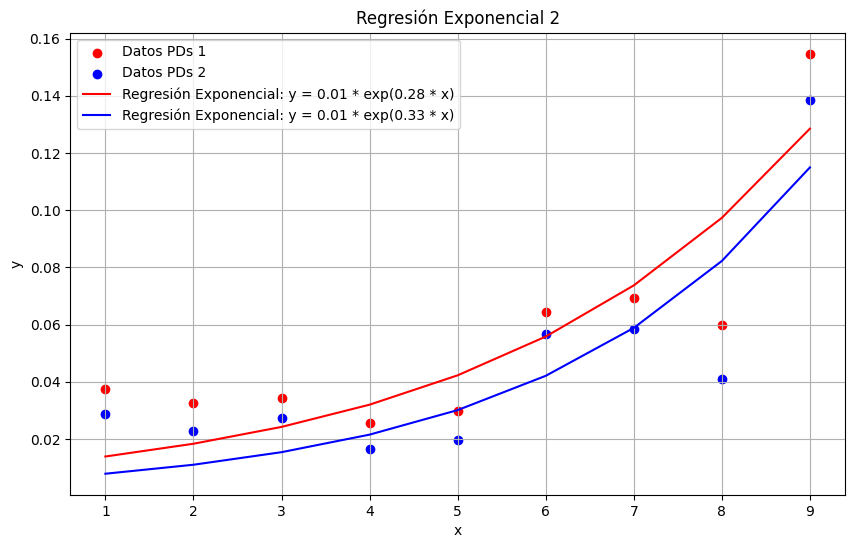

Parámetro a óptimo: 0.01
Parámetro b óptimo: 0.28


In [126]:
#como se veria una grafica de regresion exp con los valores de x_values y y_values
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Supongamos que tienes tus datos x e y en listas o arrays de NumPy
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_data = weigth_pds_1 # Ejemplo de datos con tendencia exponencial
y_data_2 = weigth_pds_2

# 2. Ajustar la curva exponencial a los datos
popt, pcov = curve_fit(exponential_function, x_data, y_data, p0=[1, 1]) # p0 es una estimación inicial de los parámetros
popt_2, pcov_2 = curve_fit(exponential_function, x_data, y_data_2, p0=[1, 1]) # p0 es una estimación inicial de los parámetros
# 3. Obtener los parámetros ajustados
a_optimo, b_optimo = popt
a_optimo_2, b_optimo_2 = popt_2
# 4. Generar la curva de regresión exponencial utilizando los parámetros óptimos
y_fit = exponential_function(x_data, a_optimo, b_optimo)
y_fit_2 = exponential_function(x_data, a_optimo_2, b_optimo_2)
# 5. Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data,color='red', label='Datos PDs 1')
plt.scatter(x_data, y_data_2,color='blue', label='Datos PDs 2')
plt.plot(x_data, y_fit, color='red', label=f'Regresión Exponencial: y = {a_optimo:.2f} * exp({b_optimo:.2f} * x)')
plt.plot(x_data, y_fit_2, color='blue', label=f'Regresión Exponencial: y = {a_optimo_2:.2f} * exp({b_optimo_2:.2f} * x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Exponencial 2')
plt.legend()
plt.grid(True)
plt.show()

# (Opcional) Imprimir los parámetros ajustados
print(f"Parámetro a óptimo: {a_optimo:.2f}")
print(f"Parámetro b óptimo: {b_optimo:.2f}")

In [103]:
df_original['Implied PD 1_1'] = y_fit
df_original['Implied PD 2_1'] = y_fit_2
df_original

,Grade,No. of Customers,No. of Defaults,Bayesian Estimates,Lambda,Implied PD 1,Implied PD 2,Implied PD 1_1,Implied PD 2_1
0,AAA,34,1,0.047619,0.029412,0.050857,0.027715,0.013918,0.007901
1,AA,56,1,0.047619,0.017857,0.056862,0.030987,0.018376,0.011042
2,A,119,3,0.142857,0.025210,0.063576,0.034646,0.024262,0.015431
3,BBB,257,2,0.095238,0.007782,0.071082,0.038736,0.032032,0.021565
4,BB,191,2,0.095238,0.010471,0.079474,0.043310,0.042292,0.030138
5,B,102,6,0.285714,0.058824,0.088858,0.048423,0.055837,0.042119
6,CCC,50,3,0.142857,0.060000,0.099349,0.054141,0.073720,0.058862
7,CC,34,1,0.047619,0.029412,0.111079,0.060533,0.097331,0.082262
8,C,12,2,0.095238,0.166667,0.124193,0.067680,0.128505,0.114964


3 by 3 correlation grades, this way the group of A,B or C grades are more related that out of his group

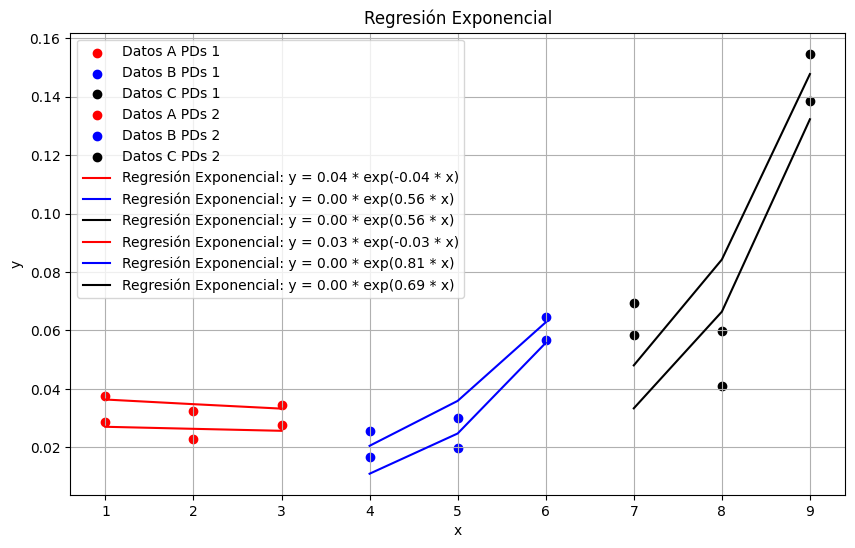

In [104]:
x_data = np.array([1, 2, 3])
x_data_2 = np.array([4, 5, 6])
x_data_3 = np.array([7, 8, 9])
y_data = weigth_pds_1[:3] # Ejemplo de datos con tendencia exponencial
y_data_2 = weigth_pds_1[3:6]
y_data_3 = weigth_pds_1[6:]
z_data = weigth_pds_2[:3] # Ejemplo de datos con tendencia exponencial
z_data_2 = weigth_pds_2[3:6]
z_data_3 = weigth_pds_2[6:]

popt, pcov = curve_fit(exponential_function, x_data, y_data, p0=[1, 1])
popt_2, pcov_2 = curve_fit(exponential_function, x_data_2, y_data_2, p0=[1, 1])
popt_3, pcov_3 = curve_fit(exponential_function, x_data_3, y_data_3, p0=[1, 1])

popt_4, pcov_4 = curve_fit(exponential_function, x_data, z_data, p0=[1, 1])
popt_5, pcov_5 = curve_fit(exponential_function, x_data_2, z_data_2, p0=[1, 1])
popt_6, pcov_6 = curve_fit(exponential_function, x_data_3, z_data_3, p0=[1, 1])
# 3. Obtener los parámetros ajustados
a_optimo, b_optimo = popt
a_optimo_2, b_optimo_2 = popt_2
a_optimo_3, b_optimo_3 = popt_3
a_optimo_4, b_optimo_4 = popt_4
a_optimo_5, b_optimo_5 = popt_5
a_optimo_6, b_optimo_6 = popt_6
# 4. Generar la curva de regresión exponencial utilizando los parámetros óptimos
y_fit = exponential_function(x_data, a_optimo, b_optimo)
y_fit_2 = exponential_function(x_data_2, a_optimo_2, b_optimo_2)
y_fit_3 = exponential_function(x_data_3, a_optimo_3, b_optimo_3)
y_fit_4 = exponential_function(x_data, a_optimo_4, b_optimo_4)
y_fit_5 = exponential_function(x_data_2, a_optimo_5, b_optimo_5)
y_fit_6 = exponential_function(x_data_3, a_optimo_6, b_optimo_6)
# 5. Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data,color='red', label='Datos A PDs 1')
plt.scatter(x_data_2, y_data_2,color='blue', label='Datos B PDs 1')
plt.scatter(x_data_3, y_data_3,color='black', label='Datos C PDs 1')
plt.scatter(x_data, z_data,color='red', label='Datos A PDs 2')
plt.scatter(x_data_2, z_data_2,color='blue', label='Datos B PDs 2')
plt.scatter(x_data_3, z_data_3,color='black', label='Datos C PDs 2')
plt.plot(x_data, y_fit, color='red', label=f'Regresión Exponencial: y = {a_optimo:.2f} * exp({b_optimo:.2f} * x)')
plt.plot(x_data_2, y_fit_2, color='blue', label=f'Regresión Exponencial: y = {a_optimo_2:.2f} * exp({b_optimo_2:.2f} * x)')
plt.plot(x_data_3, y_fit_3, color='black', label=f'Regresión Exponencial: y = {a_optimo_3:.2f} * exp({b_optimo_3:.2f} * x)')
plt.plot(x_data, y_fit_4, color='red', label=f'Regresión Exponencial: y = {a_optimo_4:.2f} * exp({b_optimo_4:.2f} * x)')
plt.plot(x_data_2, y_fit_5, color='blue', label=f'Regresión Exponencial: y = {a_optimo_5:.2f} * exp({b_optimo_5:.2f} * x)')
plt.plot(x_data_3, y_fit_6, color='black', label=f'Regresión Exponencial: y = {a_optimo_6:.2f} * exp({b_optimo_6:.2f} * x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Exponencial')
plt.legend()
plt.grid(True)
plt.show()


In [105]:
y_juntos_1 = np.concatenate((y_fit, y_fit_2, y_fit_3))
y_juntos_2 = np.concatenate((y_fit_4, y_fit_5, y_fit_6))

compare PDs 3 by 3 correlation with implied 1_1 and 2_1 (soft all correlation)

In [106]:
#compare y_juntos_1 with df_original['Implied PD 1_1']
print(pd.DataFrame({'y_juntos_1': y_juntos_1, 'Implied PD 1_1': df_original['Implied PD 1_1'].tolist()}))

   y_juntos_1  Implied PD 1_1
0    0.036374        0.013918
1    0.034781        0.018376
2    0.033257        0.024262
3    0.020531        0.032032
4    0.035906        0.042292
5    0.062796        0.055837
6    0.048062        0.073720
7    0.084267        0.097331
8    0.147745        0.128505


In [107]:
print(pd.DataFrame({'y_juntos_2': y_juntos_2, 'Implied PD 2_1': df_original['Implied PD 2_1'].tolist()}))

   y_juntos_2  Implied PD 2_1
0    0.027044        0.007901
1    0.026346        0.011042
2    0.025666        0.015431
3    0.010982        0.021565
4    0.024745        0.030138
5    0.055757        0.042119
6    0.033360        0.058862
7    0.066427        0.082262
8    0.132273        0.114964


In [108]:
def es_creciente_estricta(lista):
    """
    Verifica si los elementos de una lista son estrictamente crecientes.

    Args:
        lista: Una lista de números (int o float).

    Returns:
        True si la lista es estrictamente creciente, False en caso contrario.
    """

    if len(lista) <= 1:
        return True  # Una lista con 0 o 1 elementos se considera estrictamente creciente

    for i in range(1, len(lista)):
        if lista[i] <= lista[i - 1]:
            return False  # Si un elemento es menor o igual al anterior, no es estrictamente creciente
    return True

asign an alpha weight between 3 by 3 correlation PDs and all related soft probabilities and get a growing final pds

In [109]:
probas_1 = df_original['Implied PD 1_1'].tolist()
probas_2 = np.array(y_juntos_1).tolist()
weigth_new_pds_1 = []
for alpha in np.linspace(0, 1, 100):
    for i in range(len(y_juntos_1)):
        weigth_new_pds_1.append(alpha*probas_1[i] + (1-alpha)*probas_2[i])
    if es_creciente_estricta(weigth_new_pds_1):
        break
    else:
        weigth_new_pds_1 = []
weigth_new_pds_1

[np.float64(0.022310942652436883),
 np.float64(0.02450719588025759),
 np.float64(0.027623678380701924),
 np.float64(0.027733863624505882),
 np.float64(0.03990523661900998),
 np.float64(0.05843777582100972),
 np.float64(0.06413091542429111),
 np.float64(0.09244879390955085),
 np.float64(0.13569545545634193)]

In [110]:
probas_1 = df_original['Implied PD 2_1'].tolist()
probas_2 = np.array(y_juntos_2).tolist()
weigth_new_pds_2 = []
for alpha in np.linspace(0, 1, 100):
    for i in range(len(y_juntos_2)):
        weigth_new_pds_2.append(alpha*probas_1[i] + (1-alpha)*probas_2[i])
    if es_creciente_estricta(weigth_new_pds_2):
        break
    else:
        weigth_new_pds_2 = []
weigth_new_pds_2

[np.float64(0.013508496179683485),
 np.float64(0.015524661414104631),
 np.float64(0.018428933289389535),
 np.float64(0.018464987285010052),
 np.float64(0.028558175269780432),
 np.float64(0.04611368446899569),
 np.float64(0.051391820828968884),
 np.float64(0.07762345953630466),
 np.float64(0.12003401397653482)]

In [111]:
#agregamos las PDS finales 1 y 2
df_original['PDs Finales Obtenidas mean'] = weigth_new_pds_1
df_original['PDs Finales Obtenidas 2 overall'] = weigth_new_pds_2

In [112]:
df_original

,Grade,No. of Customers,No. of Defaults,Bayesian Estimates,Lambda,Implied PD 1,Implied PD 2,Implied PD 1_1,Implied PD 2_1,PDs Finales Obtenidas mean,PDs Finales Obtenidas 2 overall
0,AAA,34,1,0.047619,0.029412,0.050857,0.027715,0.013918,0.007901,0.022311,0.013508
1,AA,56,1,0.047619,0.017857,0.056862,0.030987,0.018376,0.011042,0.024507,0.015525
2,A,119,3,0.142857,0.025210,0.063576,0.034646,0.024262,0.015431,0.027624,0.018429
3,BBB,257,2,0.095238,0.007782,0.071082,0.038736,0.032032,0.021565,0.027734,0.018465
4,BB,191,2,0.095238,0.010471,0.079474,0.043310,0.042292,0.030138,0.039905,0.028558
5,B,102,6,0.285714,0.058824,0.088858,0.048423,0.055837,0.042119,0.058438,0.046114
6,CCC,50,3,0.142857,0.060000,0.099349,0.054141,0.073720,0.058862,0.064131,0.051392
7,CC,34,1,0.047619,0.029412,0.111079,0.060533,0.097331,0.082262,0.092449,0.077623
8,C,12,2,0.095238,0.166667,0.124193,0.067680,0.128505,0.114964,0.135695,0.120034


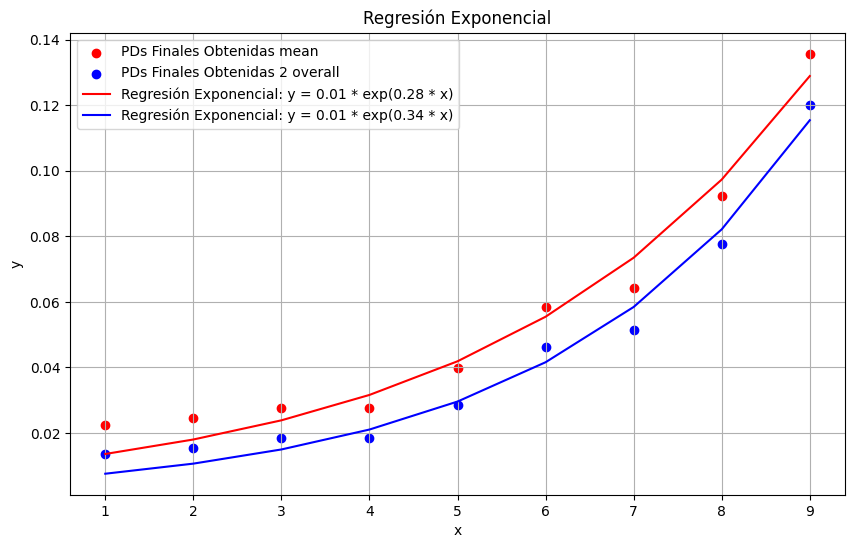

Parámetro a óptimo: 0.01
Parámetro b óptimo: 0.28


In [113]:
# Supongamos que tienes tus datos x e y en listas o arrays de NumPy
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_data = weigth_new_pds_1 # Ejemplo de datos con tendencia exponencial
y_data_2 = weigth_new_pds_2
popt, pcov = curve_fit(exponential_function, x_data, y_data, p0=[1, 1]) # p0 es una estimación inicial de los parámetros
popt_2, pcov_2 = curve_fit(exponential_function, x_data, y_data_2, p0=[1, 1])
# 3. Obtener los parámetros ajustados
a_optimo, b_optimo = popt
a_optimo_2, b_optimo_2 = popt_2
# 4. Generar la curva de regresión exponencial utilizando los parámetros óptimos
y_fit = exponential_function(x_data, a_optimo, b_optimo)
y_fit_2 = exponential_function(x_data, a_optimo_2, b_optimo_2)
# 5. Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color = 'red', label='PDs Finales Obtenidas mean')
plt.scatter(x_data, y_data_2, color = 'blue', label='PDs Finales Obtenidas 2 overall')
plt.plot(x_data, y_fit, color='red', label=f'Regresión Exponencial: y = {a_optimo:.2f} * exp({b_optimo:.2f} * x)')
plt.plot(x_data, y_fit_2, color='blue', label=f'Regresión Exponencial: y = {a_optimo_2:.2f} * exp({b_optimo_2:.2f} * x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Exponencial')
plt.legend()
plt.grid(True)
plt.show()

# (Opcional) Imprimir los parámetros ajustados
print(f"Parámetro a óptimo: {a_optimo:.2f}")
print(f"Parámetro b óptimo: {b_optimo:.2f}")

#Hasta aqui es lo importante
#lo de abajo es escenario

In [114]:
#finalmente vemos que tanto ajuste puede llegar a tener con la realidad
df_1 = df_original.copy()

grade_params = {
    row["Grade"]: {
        "p": row["Bayesian Estimates"],
        "lambda": row["PDs Finales Obtenidas mean"]
    } for _, row in df_1.iterrows()
}


print(grade_params)

# Parámetros para la convolución
n = df_1["No. of Defaults"].sum()
x_values = np.arange(0,10) #n+1)
num_convoluciones = 10  # Número de iteraciones de convolución

# Generar DataFrames para cada grado automáticamente
dataframes = {grado: convolucion_binomial_poisson(grado) for grado in grade_params}


for grado, df in dataframes.items():
    print(f"--- Tabla para {grado} ---")
    display(df)

{'AAA': {'p': 0.047619047619047616, 'lambda': 0.022310942652436883}, 'AA': {'p': 0.047619047619047616, 'lambda': 0.02450719588025759}, 'A': {'p': 0.14285714285714285, 'lambda': 0.027623678380701924}, 'BBB': {'p': 0.09523809523809523, 'lambda': 0.027733863624505882}, 'BB': {'p': 0.09523809523809523, 'lambda': 0.03990523661900998}, 'B': {'p': 0.2857142857142857, 'lambda': 0.05843777582100972}, 'CCC': {'p': 0.14285714285714285, 'lambda': 0.06413091542429111}, 'CC': {'p': 0.047619047619047616, 'lambda': 0.09244879390955085}, 'C': {'p': 0.09523809523809523, 'lambda': 0.13569545545634193}}
--- Tabla para AAA ---


,x,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x),f9(x),f10(x)
0,0,3.510227e-01,3.432778e-01,3.357037e-01,3.282968e-01,3.210533e-01,3.139696e-01,0.307042,0.300268,0.293643,0.287164
1,1,3.764055e-01,3.757594e-01,3.749585e-01,3.740101e-01,3.729210e-01,3.716978e-01,0.370347,0.368875,0.367288,0.365591
2,2,1.925975e-01,1.966462e-01,2.005895e-01,2.044265e-01,2.081564e-01,2.117784e-01,0.215292,0.218697,0.221993,0.225181
3,3,6.256152e-02,6.547565e-02,6.841364e-02,7.137264e-02,7.434982e-02,7.734242e-02,0.080348,0.083363,0.086386,0.089413
4,4,1.447901e-02,1.557212e-02,1.670567e-02,1.787928e-02,1.909249e-02,2.034479e-02,0.021636,0.022964,0.024331,0.025733
5,5,2.539997e-03,2.815448e-03,3.109387e-03,3.422296e-03,3.754635e-03,4.106843e-03,0.004479,0.004873,0.005287,0.005722
6,6,3.508033e-04,4.021219e-04,4.585896e-04,5.205061e-04,5.881747e-04,6.619022e-04,0.000742,0.000829,0.000923,0.001024
7,7,3.910896e-05,4.654520e-05,5.500613e-05,6.458606e-05,7.538386e-05,8.750299e-05,0.000101,0.000116,0.000133,0.000151
8,8,3.580021e-06,4.444468e-06,5.465093e-06,6.662093e-06,8.057352e-06,9.674504e-06,0.000012,0.000014,0.000016,0.000019
9,9,2.722794e-07,3.545635e-07,4.557989e-07,5.792340e-07,7.285095e-07,9.076882e-07,0.000001,0.000001,0.000002,0.000002


--- Tabla para AA ---


,x,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x),f9(x),f10(x)
0,0,3.502526e-01,3.417732e-01,3.334991e-01,3.254253e-01,3.175470e-01,0.309859,0.302358,0.295038,0.287895,0.280926
1,1,3.763489e-01,3.756137e-01,3.746935e-01,3.735977e-01,3.723353e-01,0.370915,0.369345,0.367634,0.365790,0.363819
2,2,1.930007e-01,1.974309e-01,2.017337e-01,2.059080e-01,2.099527e-01,0.213867,0.217650,0.221302,0.224822,0.228212
3,3,6.284724e-02,6.605227e-02,6.928542e-02,7.254290e-02,7.582100e-02,0.079116,0.082425,0.085743,0.089068,0.092396
4,4,1.458481e-02,1.579210e-02,1.704811e-02,1.835229e-02,1.970401e-02,0.021103,0.022547,0.024037,0.025571,0.027149
5,5,2.566306e-03,2.871840e-03,3.199799e-03,3.550812e-03,3.925480e-03,0.004324,0.004748,0.005197,0.005672,0.006172
6,6,3.556349e-04,4.128226e-04,4.762940e-04,5.464473e-04,6.236864e-04,0.000708,0.000801,0.000902,0.001012,0.001131
7,7,3.979806e-05,4.812704e-05,5.771444e-05,6.868674e-05,8.117707e-05,0.000095,0.000111,0.000129,0.000149,0.000172
8,8,3.658720e-06,4.632445e-06,5.799283e-06,7.186546e-06,8.824033e-06,0.000011,0.000013,0.000016,0.000019,0.000022
9,9,2.796222e-07,3.728991e-07,4.897854e-07,6.347119e-07,8.126931e-07,0.000001,0.000001,0.000002,0.000002,0.000002


--- Tabla para A ---


,x,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x),f9(x),f10(x)
0,0,0.038205,0.037164,0.036152,0.035167,0.034208,0.033276,0.032370,0.031488,0.030630,0.029795
1,1,0.134773,0.132128,0.129526,0.126969,0.124454,0.121983,0.119553,0.117166,0.114820,0.112515
2,2,0.226571,0.224034,0.221494,0.218953,0.216412,0.213873,0.211336,0.208803,0.206274,0.203750
3,3,0.241451,0.241011,0.240514,0.239961,0.239354,0.238694,0.237983,0.237222,0.236413,0.235558
4,4,0.183017,0.184603,0.186133,0.187607,0.189026,0.190388,0.191694,0.192945,0.194141,0.195281
5,5,0.104943,0.107092,0.109225,0.111341,0.113438,0.115516,0.117574,0.119611,0.121625,0.123617
6,6,0.047265,0.048866,0.050481,0.052111,0.053753,0.055408,0.057074,0.058750,0.060436,0.062131
7,7,0.017136,0.017979,0.018842,0.019727,0.020631,0.021556,0.022501,0.023466,0.024451,0.025454
8,8,0.005084,0.005424,0.005778,0.006146,0.006528,0.006925,0.007337,0.007763,0.008204,0.008661
9,9,0.001248,0.001358,0.001473,0.001595,0.001725,0.001861,0.002004,0.002156,0.002314,0.002481


--- Tabla para BBB ---


,x,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x),f9(x),f10(x)
0,0,0.118898,0.115646,0.112483,0.109406,0.106414,0.103503,0.100672,0.097918,0.095240,0.092635
1,1,0.266125,0.262053,0.258005,0.253982,0.249986,0.246019,0.242082,0.238176,0.234302,0.230463
2,2,0.283996,0.283451,0.282810,0.282076,0.281253,0.280343,0.279350,0.278277,0.277127,0.275903
3,3,0.192215,0.194718,0.197137,0.199470,0.201719,0.203882,0.205960,0.207953,0.209861,0.211684
4,4,0.092589,0.095349,0.098100,0.100841,0.103570,0.106285,0.108983,0.111663,0.114324,0.116962
5,5,0.033763,0.035410,0.037087,0.038794,0.040529,0.042290,0.044078,0.045890,0.047726,0.049584
6,6,0.009678,0.010360,0.011068,0.011803,0.012565,0.013354,0.014170,0.015013,0.015883,0.016779
7,7,0.002236,0.002448,0.002674,0.002914,0.003168,0.003435,0.003718,0.004015,0.004328,0.004656
8,8,0.000423,0.000476,0.000533,0.000594,0.000661,0.000734,0.000811,0.000895,0.000984,0.001080
9,9,0.000066,0.000077,0.000089,0.000101,0.000116,0.000132,0.000149,0.000169,0.000190,0.000213


--- Tabla para BB ---


,x,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x),f9(x),f10(x)
0,0,0.117460,0.112865,0.108450,0.104207,0.100131,0.096214,0.092450,0.088833,0.085358,0.082019
1,1,0.264336,0.258499,0.252714,0.246987,0.241320,0.235719,0.230187,0.224727,0.219342,0.214035
2,2,0.283769,0.282894,0.281825,0.280573,0.279148,0.277557,0.275812,0.273919,0.271888,0.269728
3,3,0.193324,0.196846,0.200191,0.203361,0.206354,0.209171,0.211812,0.214279,0.216572,0.218694
4,4,0.093801,0.097764,0.101707,0.105622,0.109505,0.113350,0.117151,0.120903,0.124602,0.128242
5,5,0.034482,0.036881,0.039340,0.041857,0.044428,0.047050,0.049718,0.052430,0.055182,0.057970
6,6,0.009974,0.010980,0.012041,0.013159,0.014332,0.015561,0.016845,0.018184,0.019578,0.021025
7,7,0.002327,0.002646,0.002993,0.003369,0.003775,0.004212,0.004681,0.005183,0.005719,0.006289
8,8,0.000446,0.000525,0.000615,0.000715,0.000827,0.000951,0.001088,0.001238,0.001403,0.001583
9,9,0.000071,0.000087,0.000106,0.000128,0.000153,0.000182,0.000214,0.000251,0.000293,0.000340


--- Tabla para B ---


,x,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x),f9(x),f10(x)
0,0,0.000805,0.000760,0.000716,0.000676,0.000637,0.000601,0.000567,0.000535,0.000505,0.000476
1,1,0.006811,0.006469,0.006144,0.005834,0.005540,0.005261,0.004996,0.004743,0.004504,0.004276
2,2,0.027453,0.026272,0.025138,0.024051,0.023008,0.022009,0.021051,0.020132,0.019251,0.018408
3,3,0.070136,0.067679,0.065296,0.062985,0.060745,0.058574,0.056471,0.054434,0.052461,0.050552
4,4,0.127429,0.124107,0.120835,0.117616,0.114450,0.111339,0.108284,0.105284,0.102341,0.099454
5,5,0.175121,0.172319,0.169488,0.166634,0.163760,0.160872,0.157973,0.155066,0.152155,0.149245
6,6,0.188998,0.188130,0.187152,0.186067,0.184882,0.183600,0.182227,0.180767,0.179225,0.177605
7,7,0.164161,0.165546,0.166801,0.167925,0.168922,0.169791,0.170536,0.171159,0.171660,0.172043
8,8,0.116664,0.119400,0.122056,0.124629,0.127116,0.129514,0.131823,0.134039,0.136161,0.138187
9,9,0.068590,0.071397,0.074199,0.076989,0.079765,0.082522,0.085256,0.087963,0.090640,0.093282


--- Tabla para CCC ---


,x,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x),f9(x),f10(x)
0,0,0.036835,0.034547,0.032401,0.030389,0.028501,0.026731,0.025070,0.023513,0.022052,0.020682
1,1,0.131286,0.125347,0.119638,0.114155,0.108892,0.103842,0.099000,0.094358,0.089911,0.085652
2,2,0.223217,0.217319,0.211425,0.205551,0.199707,0.193906,0.188158,0.182473,0.176859,0.171324
3,3,0.240857,0.239577,0.238009,0.236173,0.234087,0.231769,0.229237,0.226506,0.223594,0.220517
4,4,0.185101,0.188526,0.191649,0.194473,0.196999,0.199231,0.201174,0.202832,0.204212,0.205321
5,5,0.107780,0.112692,0.117502,0.122198,0.126768,0.131203,0.135491,0.139624,0.143596,0.147397
6,6,0.049384,0.053166,0.057015,0.060920,0.064871,0.068856,0.072864,0.076885,0.080908,0.084922
7,7,0.018254,0.020306,0.022468,0.024736,0.027108,0.029578,0.032144,0.034800,0.037540,0.040360
8,8,0.005536,0.006390,0.007322,0.008333,0.009426,0.010602,0.011861,0.013203,0.014630,0.016142
9,9,0.001394,0.001678,0.001999,0.002361,0.002766,0.003216,0.003714,0.004262,0.004862,0.005515


--- Tabla para CC ---


,x,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x),f9(x),f10(x)
0,0,3.272463e-01,0.298349,0.272004,0.247985,0.226087,0.206122,0.187921,0.171327,0.156198,0.142405
1,1,3.738621e-01,0.368431,0.361043,0.352087,0.341898,0.330763,0.318928,0.306604,0.293970,0.281177
2,2,2.049689e-01,0.219655,0.232474,0.243436,0.252582,0.259976,0.265700,0.269851,0.272532,0.273852
3,3,7.179926e-02,0.084231,0.096778,0.109265,0.121536,0.133452,0.144893,0.155758,0.165964,0.175443
4,4,1.805114e-02,0.023353,0.029291,0.035811,0.042850,0.050336,0.058192,0.066340,0.074698,0.083188
5,5,3.468832e-03,0.004989,0.006873,0.009141,0.011808,0.014881,0.018362,0.022243,0.026510,0.031145
6,6,5.298659e-04,0.000855,0.001302,0.001892,0.002649,0.003593,0.004743,0.006116,0.007729,0.009592
7,7,6.605990e-05,0.000121,0.000205,0.000327,0.000498,0.000729,0.001031,0.001419,0.001904,0.002500
8,8,6.849796e-06,0.000014,0.000027,0.000048,0.000080,0.000127,0.000193,0.000284,0.000405,0.000563
9,9,5.989978e-07,0.000001,0.000003,0.000006,0.000011,0.000019,0.000032,0.000050,0.000075,0.000111


--- Tabla para C ---


,x,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x),f9(x),f10(x)
0,0,0.106731,0.093187,0.081363,0.071038,0.062024,0.054154,0.047282,0.041283,0.036044,0.031470
1,1,0.250413,0.231283,0.212976,0.195591,0.179188,0.163799,0.149430,0.136071,0.123696,0.112270
2,2,0.281345,0.276171,0.269278,0.260996,0.251622,0.241421,0.230629,0.219448,0.208055,0.196599
3,3,0.201482,0.211300,0.219101,0.224943,0.228920,0.231146,0.231755,0.230890,0.228700,0.225337
4,4,0.103278,0.116398,0.128967,0.140804,0.151758,0.161711,0.170578,0.178299,0.184844,0.190202
5,5,0.040341,0.049183,0.058535,0.068249,0.078176,0.088170,0.098089,0.107800,0.117183,0.126129
6,6,0.012482,0.016585,0.021323,0.026672,0.032591,0.039023,0.045905,0.053159,0.060706,0.068458
7,7,0.003140,0.004585,0.006408,0.008642,0.011308,0.014421,0.017985,0.021995,0.026436,0.031286
8,8,0.000654,0.001059,0.001621,0.002369,0.003333,0.004542,0.006022,0.007796,0.009881,0.012292
9,9,0.000114,0.000208,0.000350,0.000558,0.000848,0.001239,0.001751,0.002405,0.003221,0.004219


In [115]:
aaa_conv = dataframes['AAA'].iloc[1, 1]
aa_conv = dataframes['AA'].iloc[1, 1]
a_conv = dataframes['A'].iloc[3, 1]
bbb_conv = dataframes['BBB'].iloc[2, 1]
bb_conv = dataframes['BB'].iloc[2, 1]
b_conv = dataframes['B'].iloc[6, 1]
ccc_conv = dataframes['CCC'].iloc[3, 1]
cc_conv = dataframes['CC'].iloc[1, 1]
c_conv = dataframes['C'].iloc[2, 1]
#hacer un df de todas
weigth_conv_3 = [aaa_conv, aa_conv, a_conv, bbb_conv, bb_conv, b_conv, ccc_conv, cc_conv, c_conv]
weigth_conv_3

[np.float64(0.3764054804595178),
 np.float64(0.3763489492692369),
 np.float64(0.2414514078449619),
 np.float64(0.2839959010082821),
 np.float64(0.2837688582663752),
 np.float64(0.1889981458094754),
 np.float64(0.24085749453553618),
 np.float64(0.37386211798905367),
 np.float64(0.281345377450961)]

In [116]:
#scenario 1 se duplican los customers
df_scenario_1 = df_original.copy()
df_scenario_1['No. of Customers'] = df_scenario_1['No. of Customers']*2
df_scenario_1['Lambda'] = df_scenario_1['No. of Defaults'] / df_scenario_1['No. of Customers']
df_scenario_1

,Grade,No. of Customers,No. of Defaults,Bayesian Estimates,Lambda,Implied PD 1,Implied PD 2,Implied PD 1_1,Implied PD 2_1,PDs Finales Obtenidas mean,PDs Finales Obtenidas 2 overall
0,AAA,68,1,0.047619,0.014706,0.050857,0.027715,0.013918,0.007901,0.022311,0.013508
1,AA,112,1,0.047619,0.008929,0.056862,0.030987,0.018376,0.011042,0.024507,0.015525
2,A,238,3,0.142857,0.012605,0.063576,0.034646,0.024262,0.015431,0.027624,0.018429
3,BBB,514,2,0.095238,0.003891,0.071082,0.038736,0.032032,0.021565,0.027734,0.018465
4,BB,382,2,0.095238,0.005236,0.079474,0.043310,0.042292,0.030138,0.039905,0.028558
5,B,204,6,0.285714,0.029412,0.088858,0.048423,0.055837,0.042119,0.058438,0.046114
6,CCC,100,3,0.142857,0.030000,0.099349,0.054141,0.073720,0.058862,0.064131,0.051392
7,CC,68,1,0.047619,0.014706,0.111079,0.060533,0.097331,0.082262,0.092449,0.077623
8,C,24,2,0.095238,0.083333,0.124193,0.067680,0.128505,0.114964,0.135695,0.120034


In [117]:
#se aplica lo que utilizamos para obtener las pd
pd_scenario_1 = df_scenario_1['Implied PD 1']*np.array(weigth_conv_3) + df_scenario_1['Lambda']*(1-np.array(weigth_conv_3))

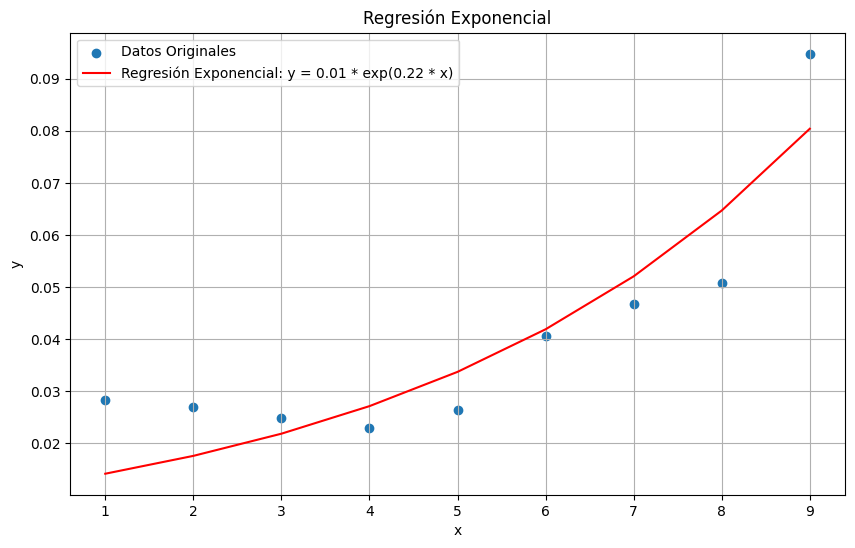

Parámetro a óptimo: 0.01
Parámetro b óptimo: 0.22


In [118]:
# Supongamos que tienes tus datos x e y en listas o arrays de NumPy
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_data = pd_scenario_1 # Ejemplo de datos con tendencia exponencial

popt, pcov = curve_fit(exponential_function, x_data, y_data, p0=[1, 1]) # p0 es una estimación inicial de los parámetros

# 3. Obtener los parámetros ajustados
a_optimo, b_optimo = popt

# 4. Generar la curva de regresión exponencial utilizando los parámetros óptimos
y_fit = exponential_function(x_data, a_optimo, b_optimo)

# 5. Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Datos Originales')
plt.plot(x_data, y_fit, color='red', label=f'Regresión Exponencial: y = {a_optimo:.2f} * exp({b_optimo:.2f} * x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Exponencial')
plt.legend()
plt.grid(True)
plt.show()

# (Opcional) Imprimir los parámetros ajustados
print(f"Parámetro a óptimo: {a_optimo:.2f}")
print(f"Parámetro b óptimo: {b_optimo:.2f}")

In [119]:
y_fit

array([0.01411238, 0.01754143, 0.02180367, 0.02710156, 0.03368674,
       0.04187199, 0.05204611, 0.06469235, 0.0804114 ])

In [120]:
df_scenario_1['Implied PD_3'] = y_fit
df_scenario_1

,Grade,No. of Customers,No. of Defaults,Bayesian Estimates,Lambda,Implied PD 1,Implied PD 2,Implied PD 1_1,Implied PD 2_1,PDs Finales Obtenidas mean,PDs Finales Obtenidas 2 overall,Implied PD_3
0,AAA,68,1,0.047619,0.014706,0.050857,0.027715,0.013918,0.007901,0.022311,0.013508,0.014112
1,AA,112,1,0.047619,0.008929,0.056862,0.030987,0.018376,0.011042,0.024507,0.015525,0.017541
2,A,238,3,0.142857,0.012605,0.063576,0.034646,0.024262,0.015431,0.027624,0.018429,0.021804
3,BBB,514,2,0.095238,0.003891,0.071082,0.038736,0.032032,0.021565,0.027734,0.018465,0.027102
4,BB,382,2,0.095238,0.005236,0.079474,0.043310,0.042292,0.030138,0.039905,0.028558,0.033687
5,B,204,6,0.285714,0.029412,0.088858,0.048423,0.055837,0.042119,0.058438,0.046114,0.041872
6,CCC,100,3,0.142857,0.030000,0.099349,0.054141,0.073720,0.058862,0.064131,0.051392,0.052046
7,CC,68,1,0.047619,0.014706,0.111079,0.060533,0.097331,0.082262,0.092449,0.077623,0.064692
8,C,24,2,0.095238,0.083333,0.124193,0.067680,0.128505,0.114964,0.135695,0.120034,0.080411


grafica de las PDs del paper

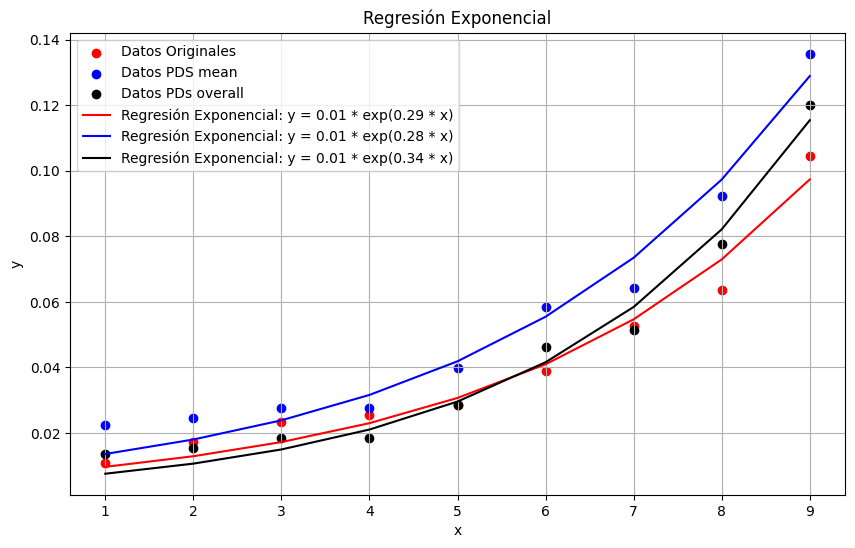

In [121]:
# Supongamos que tienes tus datos x e y en listas o arrays de NumPy
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_data = np.array([1.08/100,1.74/100,2.33/100,2.55/100,2.85/100,3.90/100,5.28/100,6.36/100,10.46/100]) # Ejemplo de datos con tendencia exponencial
y_data_2 = weigth_new_pds_1
y_data_3 = weigth_new_pds_2

popt, pcov = curve_fit(exponential_function, x_data, y_data, p0=[1, 1])
popt_2, pcov_2 = curve_fit(exponential_function, x_data, y_data_2, p0=[1, 1])
popt_3, pcov_3 = curve_fit(exponential_function, x_data, y_data_3, p0=[1, 1])
# 3. Obtener los parámetros ajustados
a_optimo, b_optimo = popt
a_optimo_2, b_optimo_2 = popt_2
a_optimo_3, b_optimo_3 = popt_3
# 4. Generar la curva de regresión exponencial utilizando los parámetros óptimos
y_fit = exponential_function(x_data, a_optimo, b_optimo)
y_fit_2 = exponential_function(x_data, a_optimo_2, b_optimo_2)
y_fit_3 = exponential_function(x_data, a_optimo_3, b_optimo_3)
# 5. Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data,color= 'red', label='Datos Originales')
plt.scatter(x_data, y_data_2,color = 'blue', label='Datos PDS mean')
plt.scatter(x_data, y_data_3,color = 'black', label='Datos PDs overall')
plt.plot(x_data, y_fit, color='red', label=f'Regresión Exponencial: y = {a_optimo:.2f} * exp({b_optimo:.2f} * x)')
plt.plot(x_data, y_fit_2, color='blue', label=f'Regresión Exponencial: y = {a_optimo_2:.2f} * exp({b_optimo_2:.2f} * x)')
plt.plot(x_data, y_fit_3, color='black', label=f'Regresión Exponencial: y = {a_optimo_3:.2f} * exp({b_optimo_3:.2f} * x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Exponencial')
plt.legend()
plt.grid(True)
plt.show()

verify the 3 by 3 correlation, on the PDs of the original paper

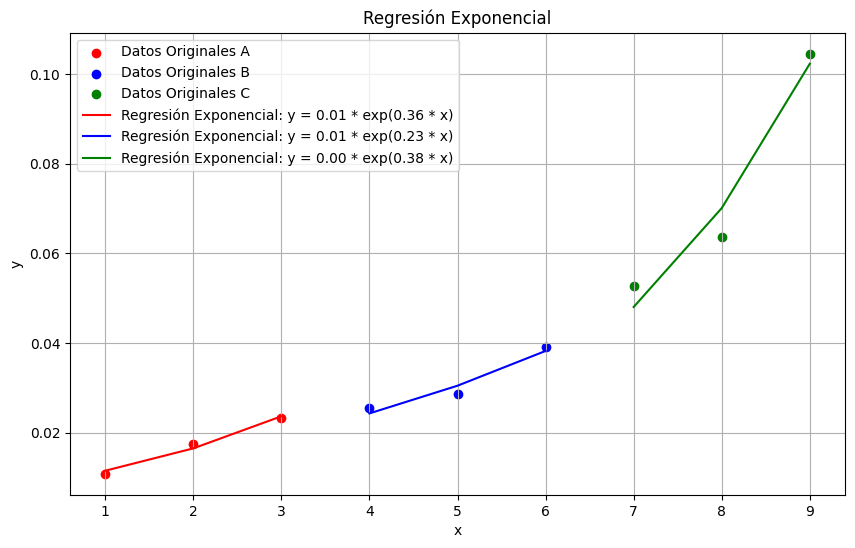

Parámetro a óptimo: 0.01
Parámetro b óptimo: 0.36


In [122]:
# Supongamos que tienes tus datos x e y en listas o arrays de NumPy
x_data = np.array([1, 2, 3])
x_data_2 = np.array([4, 5, 6])
x_data_3 = np.array([7, 8, 9])
y_data = np.array([1.08/100,1.74/100,2.33/100]) # Ejemplo de datos con tendencia exponencial
y_data_2 = np.array([2.55/100,2.85/100,3.90/100])
y_data_3 = np.array([5.28/100,6.36/100,10.46/100])
# 1. Definir la función exponencial que queremos ajustar
popt, pcov = curve_fit(exponential_function, x_data, y_data, p0=[1, 1]) # p0 es una estimación inicial de los parámetros
popt_2, pcov_2 = curve_fit(exponential_function, x_data_2, y_data_2, p0=[1, 1]) # p0 es una estimación inicial de los parámetros
popt_3, pcov_3 = curve_fit(exponential_function, x_data_3, y_data_3, p0=[1, 1]) # p0 es una estimación inicial de los parámetros
# 3. Obtener los parámetros ajustados
a_optimo, b_optimo = popt
a_optimo_2, b_optimo_2 = popt_2
a_optimo_3, b_optimo_3 = popt_3
# 4. Generar la curva de regresión exponencial utilizando los parámetros óptimos
y_fit = exponential_function(x_data, a_optimo, b_optimo)
y_fit_2 = exponential_function(x_data_2, a_optimo_2, b_optimo_2)
y_fit_3 = exponential_function(x_data_3, a_optimo_3, b_optimo_3)
# 5. Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data,color='red', label='Datos Originales A')
plt.scatter(x_data_2, y_data_2,color='blue', label='Datos Originales B')
plt.scatter(x_data_3, y_data_3,color='green', label='Datos Originales C')
plt.plot(x_data, y_fit, color='red', label=f'Regresión Exponencial: y = {a_optimo:.2f} * exp({b_optimo:.2f} * x)')
plt.plot(x_data_2, y_fit_2, color='blue', label=f'Regresión Exponencial: y = {a_optimo_2:.2f} * exp({b_optimo_2:.2f} * x)')
plt.plot(x_data_3, y_fit_3, color='green', label=f'Regresión Exponencial: y = {a_optimo_3:.2f} * exp({b_optimo_3:.2f} * x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Exponencial')
plt.legend()
plt.grid(True)
plt.show()

# (Opcional) Imprimir los parámetros ajustados
print(f"Parámetro a óptimo: {a_optimo:.2f}")
print(f"Parámetro b óptimo: {b_optimo:.2f}")